In [160]:
import numpy as np
from scipy.ndimage import shift

def translate_image(img, max_shift=2):
    # img: 2D numpy array (npr. 28x28)
    dx = np.random.randint(-max_shift, max_shift+1)
    dy = np.random.randint(-max_shift, max_shift+1)
    return shift(img, shift=(dy, dx), mode='nearest')


In [161]:
from torchvision import datasets, transforms
import torchvision
from scipy.ndimage import rotate
from scipy.ndimage import shift
import numpy as np

KWARGS = {'root':'./data', 'train':True, 'download':True, 'transform':transforms.ToTensor()}
trainset=torchvision.datasets.MNIST(**KWARGS)

X = trainset.data
y = trainset.targets

total = X.shape[0]
print(f'Total number of samples: {total}')



# train-test split in numpy
split_ratio = 0.8
split_index = int(total * split_ratio)
X_train = X[:split_index].numpy()
y_train = y[:split_index].numpy()
X_test = X[split_index:].numpy()
y_test = y[split_index:].numpy()

'''def translate_image(img, max_shift=2):
    # img: 2D numpy array (npr. 28x28)
    dx = np.random.randint(-max_shift, max_shift+1)
    dy = np.random.randint(-max_shift, max_shift+1)
    return shift(img, shift=(dy, dx), mode='nearest')
X_translated_train = []
Y_translated_train = []
for i in range(len(X_train)):
    X_translated = translate_image(X_train[i], max_shift=2)
    X_translated_train.append(X_translated)
    Y_translated_train.append(y_train[i])

X_train =  np.concatenate([np.array(X_train), np.array(X_translated_train)], axis=0)
y_train =  np.concatenate([np.array(y_train), np.array(Y_translated_train)], axis=0)


#adding rotation [-15,15] of every image from X_train to X_train
X_15train = []
Y_15train = []

for i,x in enumerate(X_train):
    rotated = rotate(x, 15, reshape=False, order=1)
    rotated_int = np.clip(rotated, 0, 255).astype(np.uint8)

    X_15train.append(rotated_int)
    Y_15train.append(y_train[i])

X_n15train = []
Y_n15train = []

for i,x in enumerate(X_train):
    rotated = rotate(x, -15, reshape=False, order=1)
    rotated_int = np.clip(rotated, 0, 255).astype(np.uint8)

    X_n15train.append(rotated_int)
    Y_n15train.append(y_train[i])


X_train = np.concatenate([np.array(X_train), np.array(X_15train), np.array(X_n15train)], axis=0)
y_train = np.concatenate([np.array(y_train), np.array(Y_15train), np.array(Y_n15train)], axis=0)

'''




Total number of samples: 60000


"def translate_image(img, max_shift=2):\n    # img: 2D numpy array (npr. 28x28)\n    dx = np.random.randint(-max_shift, max_shift+1)\n    dy = np.random.randint(-max_shift, max_shift+1)\n    return shift(img, shift=(dy, dx), mode='nearest')\nX_translated_train = []\nY_translated_train = []\nfor i in range(len(X_train)):\n    X_translated = translate_image(X_train[i], max_shift=2)\n    X_translated_train.append(X_translated)\n    Y_translated_train.append(y_train[i])\n\nX_train =  np.concatenate([np.array(X_train), np.array(X_translated_train)], axis=0)\ny_train =  np.concatenate([np.array(y_train), np.array(Y_translated_train)], axis=0)\n\n\n#adding rotation [-15,15] of every image from X_train to X_train\nX_15train = []\nY_15train = []\n\nfor i,x in enumerate(X_train):\n    rotated = rotate(x, 15, reshape=False, order=1)\n    rotated_int = np.clip(rotated, 0, 255).astype(np.uint8)\n\n    X_15train.append(rotated_int)\n    Y_15train.append(y_train[i])\n\nX_n15train = []\nY_n15train = [

In [162]:
X_train.shape

(48000, 28, 28)

In [163]:
import numpy as np

# sada kreiram matrice Ai i neka znamenka tako da su stupci podaci za treniranje za tu znamenku
A0 = X_train[y_train==0].reshape(-1,28*28).T
A1 = X_train[y_train==1].reshape(-1,28*28).T
A2 = X_train[y_train==2].reshape(-1,28*28).T
A3 = X_train[y_train==3].reshape(-1,28*28).T
A4 = X_train[y_train==4].reshape(-1,28*28).T
A5 = X_train[y_train==5].reshape(-1,28*28).T
A6 = X_train[y_train==6].reshape(-1,28*28).T
A7 = X_train[y_train==7].reshape(-1,28*28).T
A8 = X_train[y_train==8].reshape(-1,28*28).T
A9 = X_train[y_train==9].reshape(-1,28*28).T
import torchvision.transforms as T
from PIL import Image

# Definiraj transformacije (rotacija do 15 stupnjeva, translacija do 10%)
augmenter = T.Compose([
    T.ToPILImage(),
    T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    T.ToTensor()
])

import numpy as np
import torch
from PIL import Image
import torchvision.transforms as T
'''
# Definiraj transformacije
augmenter = T.Compose([
    T.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    T.ToTensor()
])

def augment_class_matrix(A, num_variations=1):
    """
    Uzima matricu A (784, N) i vraća proširenu matricu.
    Sve slike su float32 u rasponu [0,1].
    """
    all_variants = [A.astype(np.float32) / 255.0]  # normaliziramo originale
    
    n_samples = A.shape[1]
    
    for _ in range(num_variations):
        augmented_batch = np.zeros_like(all_variants[0])
        for i in range(n_samples):
            img_array = A[:, i].reshape(28, 28).astype(np.uint8)
            img = Image.fromarray(img_array)
            aug_tensor = augmenter(img)  # ToTensor vraća float [0,1]
            augmented_batch[:, i] = aug_tensor.numpy().reshape(-1)
        all_variants.append(augmented_batch)
    
    return np.hstack(all_variants)


# Primijeni augmentaciju na svaku matricu Ai
A0 = augment_class_matrix(A0, num_variations=2)
A1 = augment_class_matrix(A1, num_variations=2)
A2 = augment_class_matrix(A2, num_variations=2)
A3 = augment_class_matrix(A3, num_variations=2)
A4 = augment_class_matrix(A4, num_variations=2)
A5 = augment_class_matrix(A5, num_variations=2)
A6 = augment_class_matrix(A6, num_variations=2)
A7 = augment_class_matrix(A7, num_variations=2)
A8 = augment_class_matrix(A8, num_variations=2)
A9 = augment_class_matrix(A9, num_variations=2)
'''


# izracunaj sredinu za svaku znamenku
mu0 = np.mean(A0, axis=1, keepdims=True)
mu1 = np.mean(A1, axis=1, keepdims=True)
mu2 = np.mean(A2, axis=1, keepdims=True)
mu3 = np.mean(A3, axis=1, keepdims=True)    
mu4 = np.mean(A4, axis=1, keepdims=True)
mu5 = np.mean(A5, axis=1, keepdims=True)
mu6 = np.mean(A6, axis=1, keepdims=True)
mu7 = np.mean(A7, axis=1, keepdims=True)
mu8 = np.mean(A8, axis=1, keepdims=True)
mu9 = np.mean(A9, axis=1, keepdims=True)

A0 = A0 - mu0
A1 = A1 - mu1
A2 = A2 - mu2
A3 = A3 - mu3
A4 = A4 - mu4
A5 = A5 - mu5
A6 = A6 - mu6
A7 = A7 - mu7
A8 = A8 - mu8
A9 = A9 - mu9


# svd
U0, S0, V0 = np.linalg.svd(A0, full_matrices=False)
U1, S1, V1 = np.linalg.svd(A1, full_matrices=False)
U2, S2, V2 = np.linalg.svd(A2, full_matrices=False)
U3, S3, V3 = np.linalg.svd(A3, full_matrices=False) 
U4, S4, V4 = np.linalg.svd(A4, full_matrices=False)
U5, S5, V5 = np.linalg.svd(A5, full_matrices=False)
U6, S6, V6 = np.linalg.svd(A6, full_matrices=False)
U7, S7, V7 = np.linalg.svd(A7, full_matrices=False)
U8, S8, V8 = np.linalg.svd(A8, full_matrices=False)
U9, S9, V9 = np.linalg.svd(A9, full_matrices=False) 



In [164]:
def chose_k(A, energy=0.70):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    total_energy = np.sum(S**2)
    energy_sum = 0
    k = 0
    while energy_sum / total_energy < energy:
        energy_sum += S[k]**2
        k += 1
    return k

k0 = chose_k(A0)
k1 = chose_k(A1)
k2 = chose_k(A2)
k3 = chose_k(A3)
k4 = chose_k(A4)
k5 = chose_k(A5)
k6 = chose_k(A6)
k7 = chose_k(A7)
k8 = chose_k(A8)
k9 = chose_k(A9)

print("k0:", k0)
print("k1:", k1)    
print("k2:", k2)
print("k3:", k3)
print("k4:", k4)
print("k5:", k5)    
print("k6:", k6)
print("k7:", k7)
print("k8:", k8)
print("k9:", k9)
        





k0: 15
k1: 7
k2: 24
k3: 22
k4: 20
k5: 21
k6: 17
k7: 16
k8: 25
k9: 17


In [165]:
def project_onto_subspace(U, k, x_centered):
    U_k = U[:, :k]
    projection = U_k @ (U_k.T @ x_centered)
    return projection

def classify_digit(x, eps=1e-6):
    errors = []
    for S, U, k, mu in [
        (S0, U0, k0, mu0), (S1, U1, k1, mu1), (S2, U2, k2, mu2),
        (S3, U3, k3, mu3), (S4, U4, k4, mu4),
        (S5, U5, k5, mu5), (S6, U6, k6, mu6),
        (S7, U7, k7, mu7), (S8, U8, k8, mu8), (S9, U9, k9, mu9)
    ]:
        x_centered = x.reshape(-1, 1) - mu

        coeffs = U[:, :k].T @ x_centered  # koordinate u U-bazi

        # težinska udaljenost u U-smjerovima
        weighted_dist = np.sqrt(
            np.sum((coeffs.flatten()**2) / (S[:k] + eps))
        )
        alfa = 0.99
        weighted_dist = weighted_dist*alfa + np.linalg.norm(x_centered - U[:, :k] @ coeffs)*(1-alfa)
        errors.append(weighted_dist)
    

    return np.argmin(errors), np.min(errors)




In [166]:
# testiranje, 0.1 je bio dobar 
correct = 0
total = len(X_test)
wrong =  []
for energy in [0.91]:
    for lambda_ in [0.1]:
        print(f"Energy: {energy}, Lambda: {lambda_}")
        correct = 0
        total = len(X_test)
        wrong =  []
        k0 = chose_k(A0,energy)
        k1 = chose_k(A1,energy)
        k2 = chose_k(A2,energy)
        k3 = chose_k(A3,energy)
        k4 = chose_k(A4,energy)
        k5 = chose_k(A5,energy)
        k6 = chose_k(A6,energy)
        k7 = chose_k(A7,energy)
        k8 = chose_k(A8,energy)
        k9 = chose_k(A9,energy)
        print( k0, k1, k2, k3, k4, k5, k6, k7, k8, k9)

        for i in range(total):
            x = X_test[i]
            true_label = y_test[i]
            predicted_label,dist = classify_digit(x)
            if predicted_label == true_label:
                correct += 1
            else:
                wrong.append((i, true_label, predicted_label))

        print("Accuracy:", correct / total)



Energy: 0.91, Lambda: 0.1
68 40 89 87 84 82 68 73 88 69
Accuracy: 0.96025


In [7]:
wrong

[(6, np.int64(6), np.int64(5)),
 (10, np.int64(7), np.int64(2)),
 (46, np.int64(5), np.int64(8)),
 (91, np.int64(3), np.int64(8)),
 (96, np.int64(7), np.int64(4)),
 (102, np.int64(7), np.int64(8)),
 (154, np.int64(9), np.int64(8)),
 (166, np.int64(7), np.int64(2)),
 (209, np.int64(1), np.int64(8)),
 (258, np.int64(3), np.int64(5)),
 (270, np.int64(2), np.int64(3)),
 (272, np.int64(9), np.int64(8)),
 (288, np.int64(4), np.int64(9)),
 (306, np.int64(1), np.int64(2)),
 (330, np.int64(9), np.int64(4)),
 (344, np.int64(9), np.int64(8)),
 (354, np.int64(2), np.int64(9)),
 (382, np.int64(8), np.int64(5)),
 (384, np.int64(9), np.int64(3)),
 (454, np.int64(1), np.int64(4)),
 (512, np.int64(5), np.int64(2)),
 (524, np.int64(9), np.int64(3)),
 (548, np.int64(9), np.int64(8)),
 (594, np.int64(6), np.int64(5)),
 (619, np.int64(7), np.int64(2)),
 (649, np.int64(6), np.int64(5)),
 (696, np.int64(2), np.int64(8)),
 (712, np.int64(7), np.int64(2)),
 (750, np.int64(9), np.int64(4)),
 (762, np.int64(7), 

In [12]:
def show_image(i):
    (i,true_label,predicted_label)=wrong[i] 
    import matplotlib.pyplot as plt
    img = X_test[i]
    label = y_test[i]
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

36


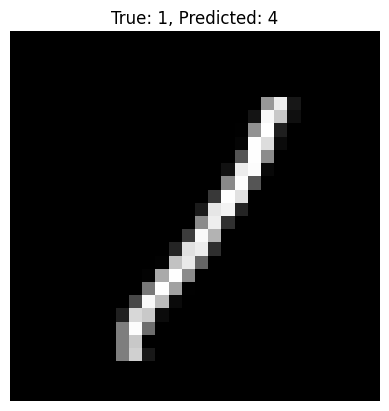

In [112]:
import random
r = random.randint(0, len(wrong)-1)
print(r)
show_image(r)

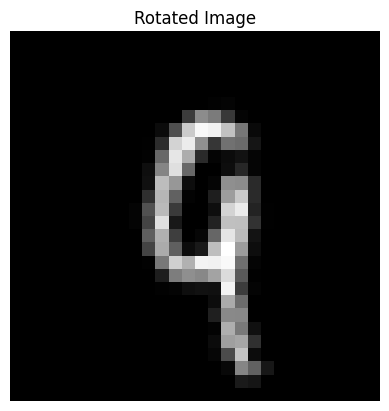

In [140]:
from scipy.ndimage import rotate

rotated = rotate(X_test[wrong[36][0]], 20, reshape=False, order=1)
rotated_int = np.clip(rotated, 0, 255).astype(np.uint8)
# show image
import matplotlib.pyplot as plt
plt.imshow(rotated_int, cmap='gray')
plt.title(f'Rotated Image')
plt.axis('off')
plt.show()

In [142]:
# testiranje
correct = 0
total = len(X_test)
wrong =  []
for i in range(total):
    x = X_test[i]
    true_label = y_test[i]

    predicted_labels = []
    predicted_distances = []

    for angle in [-15,0,15]:
        if angle == 0:
            q = x
            predicted_label, dist = classify_digit(q)
        else:
            rotated = rotate(x, angle, reshape=False, order=1)
            rotated_int = np.clip(rotated, 0, 255).astype(np.uint8)
            q = rotated_int
            predicted_label,dist = classify_digit(q)
        predicted_labels.append(predicted_label)
        predicted_distances.append(dist)

        # Voting: keep labels with highest vote count; break ties by smallest distance
        if predicted_labels:
            from collections import Counter
            cnt = Counter(predicted_labels)
            max_count = max(cnt.values())
            candidates = {lbl for lbl, c in cnt.items() if c == max_count}

            if len(candidates) == 1:
                final_predicted_label = next(iter(candidates))
            else:
                # among predictions whose label is in candidates, pick the one with smallest distance
                candidate_indices = [i for i, lbl in enumerate(predicted_labels) if lbl in candidates]
                best_idx = min(candidate_indices, key=lambda i: predicted_distances[i])
                final_predicted_label = predicted_labels[best_idx]
        else:
            final_predicted_label = None

    if final_predicted_label == true_label:
        correct += 1
    else:
        wrong.append((i, true_label, final_predicted_label))

print("Accuracy:", correct / total)

Accuracy: 0.9473333333333334


k0 after PCA: 28
k1 after PCA: 12
k2 after PCA: 46
k3 after PCA: 46
k4 after PCA: 41
k5 after PCA: 47
k6 after PCA: 33
k7 after PCA: 31
k8 after PCA: 51
k9 after PCA: 36
Accuracy after PCA: 0.9113333333333333


In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olgabelitskaya/yale-face-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dijan\.cache\kagglehub\datasets\olgabelitskaya\yale-face-database\versions\1


In [112]:
def load_images_from_folder(folder):
    images = []
    labels = []

    for filename in sorted(os.listdir(folder)):
        if filename.startswith("subject"):
            # labela iz imena: subject01 → 1
            label = int(filename[7:9])

            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((100, 100))

            images.append(np.array(img, dtype=np.float32).flatten() / 255.0)
            labels.append(label)

    return np.array(images), np.array(labels)

import os
import numpy as np
from PIL import Image
folder_path = r"C:\Users\dijan\.cache\kagglehub\datasets\olgabelitskaya\yale-face-database\versions\1\data"

images, labels = load_images_from_folder(folder_path)

print(f"Loaded {images.shape[0]} images")
print(f"Each image has {images.shape[1]} pixels")
print(f"Unique labels: {np.unique(labels)}")

# Podjela na trening i test skup
train_images = []
train_labels = []
test_images = []
test_labels = []

for label in np.unique(labels):
    label_images = images[labels == label]
    n_train = int(0.8 * label_images.shape[0])
    
    train_images.append(label_images[:n_train])
    train_labels.append(np.full(n_train, label))
    
    test_images.append(label_images[n_train:])
    test_labels.append(np.full(label_images.shape[0] - n_train, label))
    
train_images = np.vstack(train_images)
train_labels = np.concatenate(train_labels)

test_images = np.vstack(test_images)
test_labels = np.concatenate(test_labels)

print(f"Training set: {train_images.shape[1]} images")
print(f"Test set: {test_images.shape[0]} images")


Loaded 165 images
Each image has 10000 pixels
Unique labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Training set: 10000 images
Test set: 45 images


In [ ]:
img = Image.fromarray((train_images[0].reshape(100, 100) * 255).astype(np.uint8))
img.show()


In [ ]:
import numpy as np

# Pretpostavke
ne = 15  # maksimalni broj ekspresija po osobi
num_persons = 11

# Vektoriziraj prvu sliku da dobiješ ni
x = train_images[0]
ni = x.shape[0]

X_tensor = np.zeros((ni, ne, num_persons), dtype=np.float32)

print(X_tensor.shape)

for p in range(num_persons):
    person_images = train_images[train_labels == p]
    actual_ne = ne
    for e in range(actual_ne):
        X_tensor[:, e, p] = person_images[e]

print(X_tensor.shape)

# Flatten mode-1: spojimo ekspresije i osobe u jedan dimenzionalni mod
D = X_tensor.reshape(ni, -1)  # ni x (ne * num_persons)
print("Shape of D for SVD:", D.shape)

# SVD
U, S, Vt = np.linalg.svd(D, full_matrices=False)
print("Shapes: ", U.shape, S.shape, Vt.shape)

k = 200  # broj komponenti koje zadržavamo

U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]

# Aproksimacija D
D_approx = U_k @ S_k @ Vt_k

# “Foldamo” natrag u tenzor
X_tensor_approx = D_approx.reshape(ni, ne, num_persons)
print("Shape of approximated tensor:", X_tensor_approx.shape)

import matplotlib.pyplot as plt

# dimenzija slika
image_shape = (100, 100)
person = 0
expression = 0

original_image = X_tensor[:, expression, person].reshape(image_shape)
reconstructed_image = X_tensor_approx[:, expression, person].reshape(image_shape)


plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title("Originalna slika")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Rekonstruirana slika (k={k})")
plt.axis('off')

plt.show()



(10000, 15, 11)


IndexError: index 0 is out of bounds for axis 0 with size 0